In [ ]:
import pandas as pd
import  numpy as np



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# c1  c2  c3  c4
# 1   2   2   2   

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/GoogleStock/

/content/drive/MyDrive/GoogleStock


In [ ]:
%pwd

'/content/drive/MyDrive/GoogleStock'

In [ ]:
df = pd.read_csv('Google.csv').reset_index()
df.head()

,index,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,GOOG,2017-06-12 00:00:00+00:00,942.90,949.355,915.233,939.56,3731589,942.90,949.355,915.233,939.56,3731589,0.0,1.0
1,1,GOOG,2017-06-13 00:00:00+00:00,953.40,959.980,944.090,951.91,1995350,953.40,959.980,944.090,951.91,1995350,0.0,1.0
2,2,GOOG,2017-06-14 00:00:00+00:00,950.76,961.150,942.250,959.92,1477033,950.76,961.150,942.250,959.92,1477033,0.0,1.0
3,3,GOOG,2017-06-15 00:00:00+00:00,942.31,943.339,924.440,933.97,2055953,942.31,943.339,924.440,933.97,2055953,0.0,1.0
4,4,GOOG,2017-06-16 00:00:00+00:00,939.78,942.040,931.595,940.00,2921393,939.78,942.040,931.595,940.00,2921393,0.0,1.0


In [ ]:
df.drop(['index', 'symbol'],axis=1, inplace=True)
df.set_index(['date'],inplace=True)
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2017-06-12 00:00:00+00:00,942.90,949.355,915.233,939.56,3731589,942.90,949.355,915.233,939.56,3731589,0.0,1.0
2017-06-13 00:00:00+00:00,953.40,959.980,944.090,951.91,1995350,953.40,959.980,944.090,951.91,1995350,0.0,1.0
2017-06-14 00:00:00+00:00,950.76,961.150,942.250,959.92,1477033,950.76,961.150,942.250,959.92,1477033,0.0,1.0
2017-06-15 00:00:00+00:00,942.31,943.339,924.440,933.97,2055953,942.31,943.339,924.440,933.97,2055953,0.0,1.0
2017-06-16 00:00:00+00:00,939.78,942.040,931.595,940.00,2921393,939.78,942.040,931.595,940.00,2921393,0.0,1.0


In [ ]:
df.drop(df.iloc[:,5:].columns, inplace=True,axis=1)
df.head()

,close,high,low,open,volume
date,,,,,
2017-06-12 00:00:00+00:00,942.90,949.355,915.233,939.56,3731589
2017-06-13 00:00:00+00:00,953.40,959.980,944.090,951.91,1995350
2017-06-14 00:00:00+00:00,950.76,961.150,942.250,959.92,1477033
2017-06-15 00:00:00+00:00,942.31,943.339,924.440,933.97,2055953
2017-06-16 00:00:00+00:00,939.78,942.040,931.595,940.00,2921393


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = scaler.fit_transform(df)
df1[:10,:]


array([[0.0208936 , 0.01707609, 0.00972106, 0.01770069, 0.57759006],
       [0.02585702, 0.0220667 , 0.02344315, 0.02348385, 0.28131739],
       [0.02460907, 0.02261625, 0.02256819, 0.02723471, 0.19287153],
       [0.02061471, 0.01425035, 0.01409917, 0.01508305, 0.29165872],
       [0.01941876, 0.01364021, 0.01750152, 0.01790673, 0.43933782],
       [0.02773366, 0.0220714 , 0.02580173, 0.02257072, 0.19579938],
       [0.02454762, 0.02283701, 0.02625823, 0.02611086, 0.13055482],
       [0.02871689, 0.02212306, 0.02661487, 0.02429396, 0.14429172],
       [0.0276013 , 0.02241428, 0.02841709, 0.02666342, 0.1012956 ],
       [0.0316193 , 0.02489432, 0.02825066, 0.02578775, 0.1787041 ]])

In [ ]:
df1.shape

(1259, 5)

In [ ]:
# data format in trainY list
n_future=3
# here 14 is n_past

# (t, t+1, ...., t+n_future)
for i in range(10):
  print(df1[i+14:(i+14+n_future), 0])

[0.00474124 0.         0.0061499 ]
[0.         0.0061499  0.00377692]
[0.0061499  0.00377692 0.00940212]
[0.00377692 0.00940212 0.01422845]
[0.00940212 0.01422845 0.01483824]
[0.01422845 0.01483824 0.02133322]
[0.01483824 0.02133322 0.02290733]
[0.02133322 0.02290733 0.02708132]
[0.02290733 0.02708132 0.02586647]
[0.02708132 0.02586647 0.03152949]


In [ ]:
for i in range(14,25,1):
  print(df1[i,0])


0.004741240758598497
0.0
0.006149904513396476
0.003776920604307288
0.009402121504339445
0.01422844933537537
0.01483824002117723
0.02133321988390341
0.022907330723996422
0.027081324333011858
0.02586647002098813


In [ ]:
# data format in trainX list

# here 14 is n_past

# (t-n_past, t-n_past-1, ...., t-1)
n_past=14
for i in range(2):
  print(df1[i:i+n_past,:])

[[0.0208936  0.01707609 0.00972106 0.01770069 0.57759006]
 [0.02585702 0.0220667  0.02344315 0.02348385 0.28131739]
 [0.02460907 0.02261625 0.02256819 0.02723471 0.19287153]
 [0.02061471 0.01425035 0.01409917 0.01508305 0.29165872]
 [0.01941876 0.01364021 0.01750152 0.01790673 0.43933782]
 [0.02773366 0.0220714  0.02580173 0.02257072 0.19579938]
 [0.02454762 0.02283701 0.02625823 0.02611086 0.13055482]
 [0.02871689 0.02212306 0.02661487 0.02429396 0.14429172]
 [0.0276013  0.02241428 0.02841709 0.02666342 0.1012956 ]
 [0.0316193  0.02489432 0.02825066 0.02578775 0.1787041 ]
 [0.02532286 0.02832785 0.02662913 0.03190807 0.2106178 ]
 [0.01353357 0.01657586 0.01524518 0.01905868 0.37660662]
 [0.01975438 0.0139737  0.01008578 0.01275574 0.40364478]
 [0.00902396 0.0085768  0.00752749 0.01318655 0.49513726]]
[[0.02585702 0.0220667  0.02344315 0.02348385 0.28131739]
 [0.02460907 0.02261625 0.02256819 0.02723471 0.19287153]
 [0.02061471 0.01425035 0.01409917 0.01508305 0.29165872]
 [0.01941876 

In [ ]:
trainX, trainY = list(), list()

n_past = 14 #14days back for single training as a row  (None, 14, 5) will be its shape
n_future = 1 #no of days t predict


for i in range(0, len(df1)-n_future+1-n_past): # (-n_future+1 will sustain as no NaN value happen and -n_past ascertain that i+n_past>len(df1))
  trainX.append(df1[i:i+n_past,:])
  trainY.append(df1[i+n_past:i+n_past+n_future, 0]) # here 0 is taken for col1 only can be changed accord to the target var


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
(trainX.shape, trainY.shape)

((1245, 14, 5), (1245, 1))

In [ ]:
# x1 x2 y1 y2
#  1  2  3  4
#  2  3  4  5
#  3  4  5  6
#  4  5  6  7
#  5  6  7  8
#  6  7  8  9
#  7  8  9  10
#  8  9  10 NaN

In [ ]:
with tf.device('/GPU:0'):
  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model.add(LSTM(50, activation='relu', return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(trainY.shape[1]))


  model.compile(loss='mse', optimizer='adam')
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 100)           42400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 72,651
Trainable params: 72,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining callbacks
import os
path = '/content/drive/MyDrive/GoogleStock/MultivariateModel/'

if not os.path.exists(path):
  os.makedirs(path)

filepath = '/content/drive/MyDrive/GoogleStock/MultivariateModel/best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_loss', 
                              mode = 'min' , 
                              patience = 10)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit(trainX,
                      trainY,
                      epochs=20,
                      batch_size=16,
                      validation_split=0.2,
                      callbacks=callback_list,
                      verbose=1)

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.0060
Epoch 1: val_loss improved from inf to 0.00325, saving model to /content/drive/MyDrive/GoogleStock/MultivariateModel/best_weights.hdf5
63/63 [==============================] - 8s 61ms/step - loss: 0.0060 - val_loss: 0.0032
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.0018
Epoch 2: val_loss improved from 0.00325 to 0.00224, saving model to /content/drive/MyDrive/GoogleStock/MultivariateModel/best_weights.hdf5
63/63 [==============================] - 3s 56ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.0016
Epoch 3: val_loss did not improve from 0.00224
63/63 [==============================] - 4s 57ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.0012
Epoch 4: val_loss improved from 0.00224 to 0.00208, saving model to /content/drive/MyDrive/GoogleStock/Multivariate

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

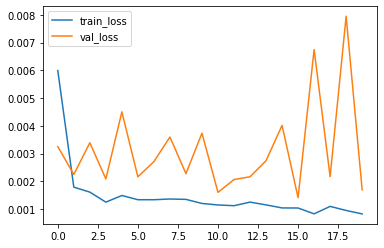

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
train_dates = pd.to_datetime(df.reset_index()['date'])
train_dates

0      2017-06-12 00:00:00+00:00
1      2017-06-13 00:00:00+00:00
2      2017-06-14 00:00:00+00:00
3      2017-06-15 00:00:00+00:00
4      2017-06-16 00:00:00+00:00
                  ...           
1254   2022-06-03 00:00:00+00:00
1255   2022-06-06 00:00:00+00:00
1256   2022-06-07 00:00:00+00:00
1257   2022-06-08 00:00:00+00:00
1258   2022-06-09 00:00:00+00:00
Name: date, Length: 1259, dtype: datetime64[ns, UTC]

In [ ]:
list(train_dates)[-1]

Timestamp('2022-06-09 00:00:00+0000', tz='UTC')

In [ ]:
# Forecasting

n_future = 90
train_dates = pd.to_datetime(df.reset_index()['date'])
forecast_dates = pd.date_range(list(train_dates)[-2], periods=n_future, freq='1d').tolist()

forecast_dates[:10]


[Timestamp('2022-06-08 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-09 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-10 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-11 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-12 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-13 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-14 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-15 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-16 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2022-06-17 00:00:00+0000', tz='UTC', freq='D')]

In [ ]:
trainX[-2:,:]

array([[[0.6378316 , 0.65801475, 0.64102503, 0.65698124, 0.17957949],
        [0.62218031, 0.63821043, 0.62510461, 0.6251715 , 0.18989453],
        [0.60863728, 0.62846407, 0.58615951, 0.62746136, 0.26151473],
        [0.63088755, 0.62334899, 0.61261032, 0.60890373, 0.2100854 ],
        [0.57661618, 0.57064349, 0.54654867, 0.5740034 , 0.45604796],
        [0.5757984 , 0.57204969, 0.56560039, 0.56243239, 0.26418799],
        [0.59902244, 0.59469469, 0.5777428 , 0.5709409 , 0.19924341],
        [0.64159434, 0.63145139, 0.61637406, 0.60594893, 0.19614578],
        [0.65331745, 0.66494598, 0.64511926, 0.63676592, 0.37853913],
        [0.65424395, 0.67401597, 0.65442044, 0.65411541, 0.18509561],
        [0.68836387, 0.67870362, 0.65211416, 0.6471522 , 0.17542132],
        [0.65828086, 0.66429779, 0.65553791, 0.66405215, 0.15372165],
        [0.68141037, 0.69279925, 0.68274042, 0.67107623, 0.14377877],
        [0.68348082, 0.67730038, 0.66939937, 0.66082575, 0.16619086]],

       [[0.6221803

In [ ]:
# n_future = 90 days
forecast = model.predict(trainX[-n_future:, :])

In [ ]:
forecast[:10,:]

array([[0.84248567],
       [0.8531415 ],
       [0.8821724 ],
       [0.90344477],
       [0.9162832 ],
       [0.9228247 ],
       [0.9225905 ],
       [0.92713004],
       [0.92644215],
       [0.91782415]], dtype=float32)

In [ ]:
forecast_copies = np.repeat(forecast, df1.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
forecast_copies[:10]

array([[0.84248567, 0.84248567, 0.84248567, 0.84248567, 0.84248567],
       [0.8531415 , 0.8531415 , 0.8531415 , 0.8531415 , 0.8531415 ],
       [0.8821724 , 0.8821724 , 0.8821724 , 0.8821724 , 0.8821724 ],
       [0.90344477, 0.90344477, 0.90344477, 0.90344477, 0.90344477],
       [0.9162832 , 0.9162832 , 0.9162832 , 0.9162832 , 0.9162832 ],
       [0.9228247 , 0.9228247 , 0.9228247 , 0.9228247 , 0.9228247 ],
       [0.9225905 , 0.9225905 , 0.9225905 , 0.9225905 , 0.9225905 ],
       [0.92713004, 0.92713004, 0.92713004, 0.92713004, 0.92713004],
       [0.92644215, 0.92644215, 0.92644215, 0.92644215, 0.92644215],
       [0.91782415, 0.91782415, 0.91782415, 0.91782415, 0.91782415]],
      dtype=float32)

In [ ]:
# Convert  timestamp to dates



for i in range(len(forecast_dates)):
  forecast_dates[i] = forecast_dates[i].date()

forecast_dates[:10]

[datetime.date(2022, 6, 8),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 10),
 datetime.date(2022, 6, 11),
 datetime.date(2022, 6, 12),
 datetime.date(2022, 6, 13),
 datetime.date(2022, 6, 14),
 datetime.date(2022, 6, 15),
 datetime.date(2022, 6, 16),
 datetime.date(2022, 6, 17)]

In [ ]:
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Close_Forecast': y_pred_future})

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
df_forecast.head()

,Date,Close_Forecast
0,2022-06-08,2680.961670
1,2022-06-09,2703.503662
2,2022-06-10,2764.917969
3,2022-06-11,2809.919434
4,2022-06-12,2837.078857


In [ ]:
original_data = df.reset_index()[['date', 'close']]
original_data['date'] = [dt.date() for dt in pd.to_datetime(original_data['date'])]
# original_data['date'] = original_data['date'].dt.normalize()
original_data = original_data.loc[pd.to_datetime(original_data['date'])>pd.Timestamp('2020-5-31')]
original_data.head()

,date,close
747,2020-06-01,1431.82
748,2020-06-02,1439.22
749,2020-06-03,1436.38
750,2020-06-04,1412.18
751,2020-06-05,1438.39


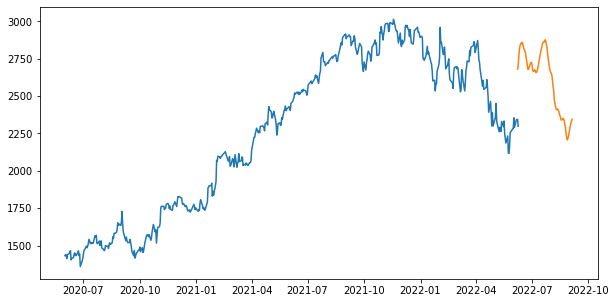

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(original_data.set_index(['date']), label='original_data')
plt.plot(df_forecast.set_index(['Date']), label='forecast')

In [ ]:
raw = pd.DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_sequence(values, 2, 1)
print(data)

   var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  var1(t)  var2(t)
2        0.0       50.0        1.0       51.0        2       52
3        1.0       51.0        2.0       52.0        3       53
4        2.0       52.0        3.0       53.0        4       54
5        3.0       53.0        4.0       54.0        5       55
6        4.0       54.0        5.0       55.0        6       56
7        5.0       55.0        6.0       56.0        7       57
8        6.0       56.0        7.0       57.0        8       58
9        7.0       57.0        8.0       58.0        9       59
